In [2]:
from eluent import dataset, activity, visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

users = [111,112,113,211,212,214,411,412,413,414,512,613,614,711,713,811,813]

In [3]:
# construct MTS matrix object for Jupyter notebook features
mts = dataset.MTS(users, 'jupyter') 

# determine the window size (in samples) using the sampling frequency
# here, we compute L=8 for an 8s window @ 6Hz
L = mts.time2L(8) 
print("L: ", L)

# extract samples and perform per sample normalization
mts.extract_samples(L, normalize=True); 

L:  48
Extracted N=5653 samples from Jupyter MTS


In [6]:
codebook = activity.Codebook(mts) # construct Codebook object
codebook.distill(cull_threshold=10) # greedy k-cluster + hierarchical clustering

Sampled M=910 centers, 16.10%% of original N=5653 sequences
--------------------------------------------------
Generated hierarchical cluster


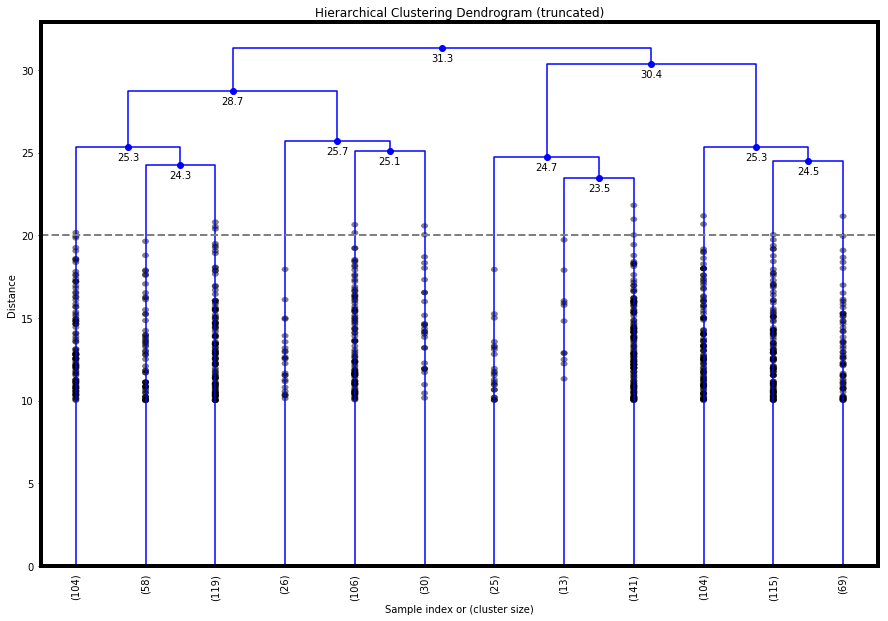

In [7]:
plt.figure(figsize=(15, 10))
codebook.visualize_linkage(d=20); # d controls vertical line 

In [8]:
codebook.extract(K=5);

Codeword 1: Cluster size=281
Codeword 2: Cluster size=26
Codeword 3: Cluster size=136
Codeword 4: Cluster size=179
Codeword 5: Cluster size=288


In [9]:
chromatogram = codebook.apply() # generates Chromatogram object
chromatogram.render(smoothing_window=3, segment_on='freqs', reorder_colors=True)

SMOOTHING STATS: Δ_raw=5572, Δ_smooth=1471, ratio=3.7879
CW LENGTH STATS: μ_raw   =1.0115, σ_raw   =0.2981
                 μ_smooth=3.7281, σ_smooth=6.4973
--------------------------------------------------
Bandwidth means: [2.9849246231155777, 4.5665236051502145, 4.9603174603174605, 1.3505154639175259, 2.728310502283105]
New color order: [2, 1, 0, 4, 3]
--------------------------------------------------
 17 USERS [111 112 113 211 212 214 411 412 413 414 512 613 614 711 713 811 813]
	 11 USERS [111 113 211 214 411 413 414 613 711 713 813]
		 6 USERS [214 411 413 613 713 813]
			 3 USERS [411 413 713]
			 3 USERS [214 613 813]
		 5 USERS [111 113 211 414 711]
			 4 USERS [111 113 211 711]
				 3 USERS [111 113 711]
				 1 USERS [211]
			 1 USERS [414]
	 6 USERS [112 212 412 512 614 811]
		 5 USERS [112 212 412 512 614]
			 2 USERS [112 212]
			 3 USERS [412 512 614]
		 1 USERS [811]
New ordering:  [411 413 713 214 613 813 111 113 711 211 414 112 212 412 512 614 811]


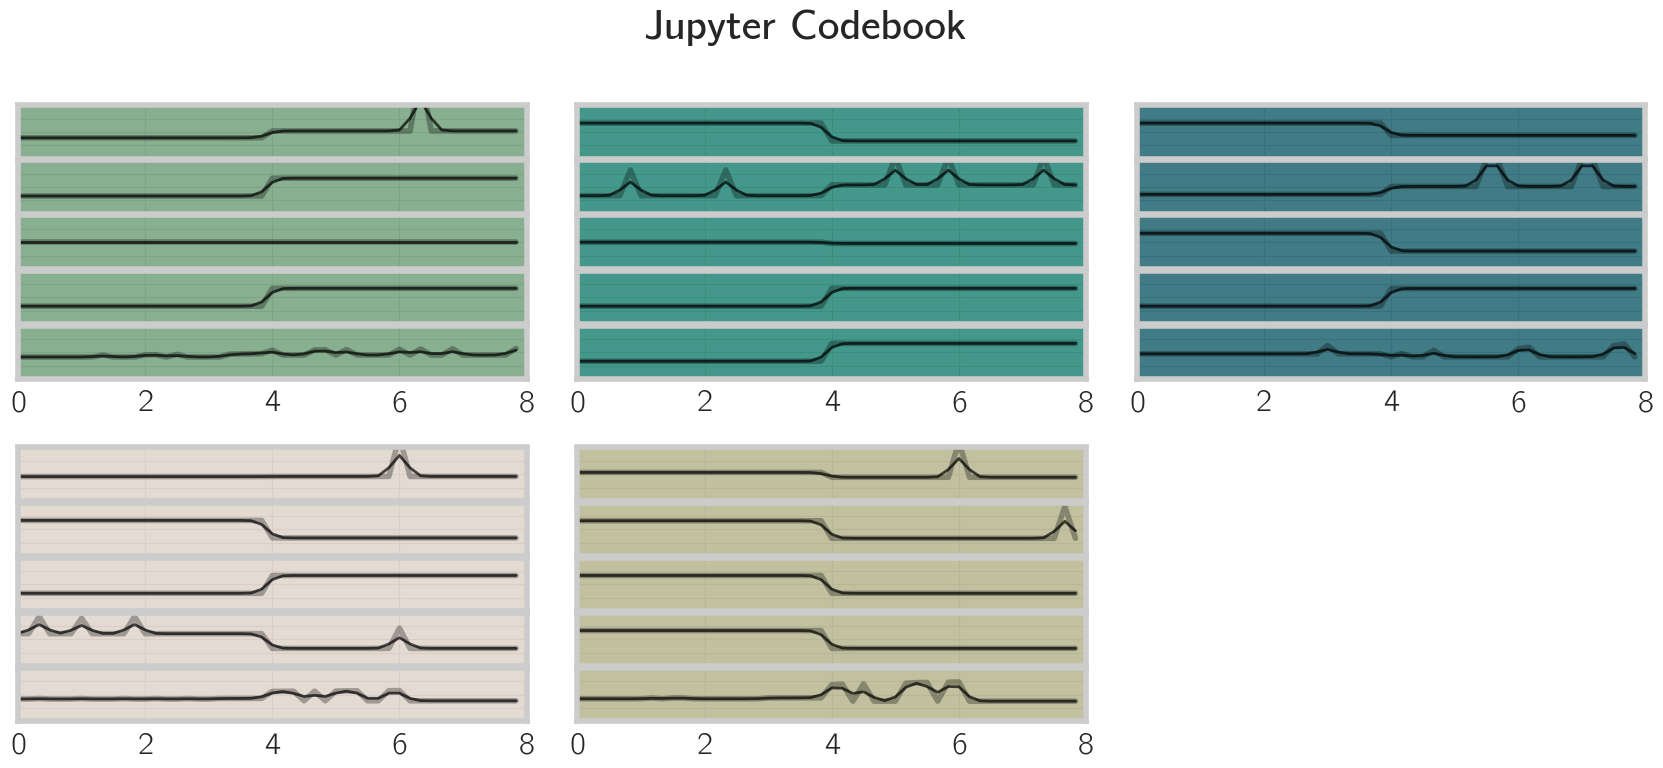

In [10]:
codebook.visualize();

reordering colors: [0 3 2 1 5 4]


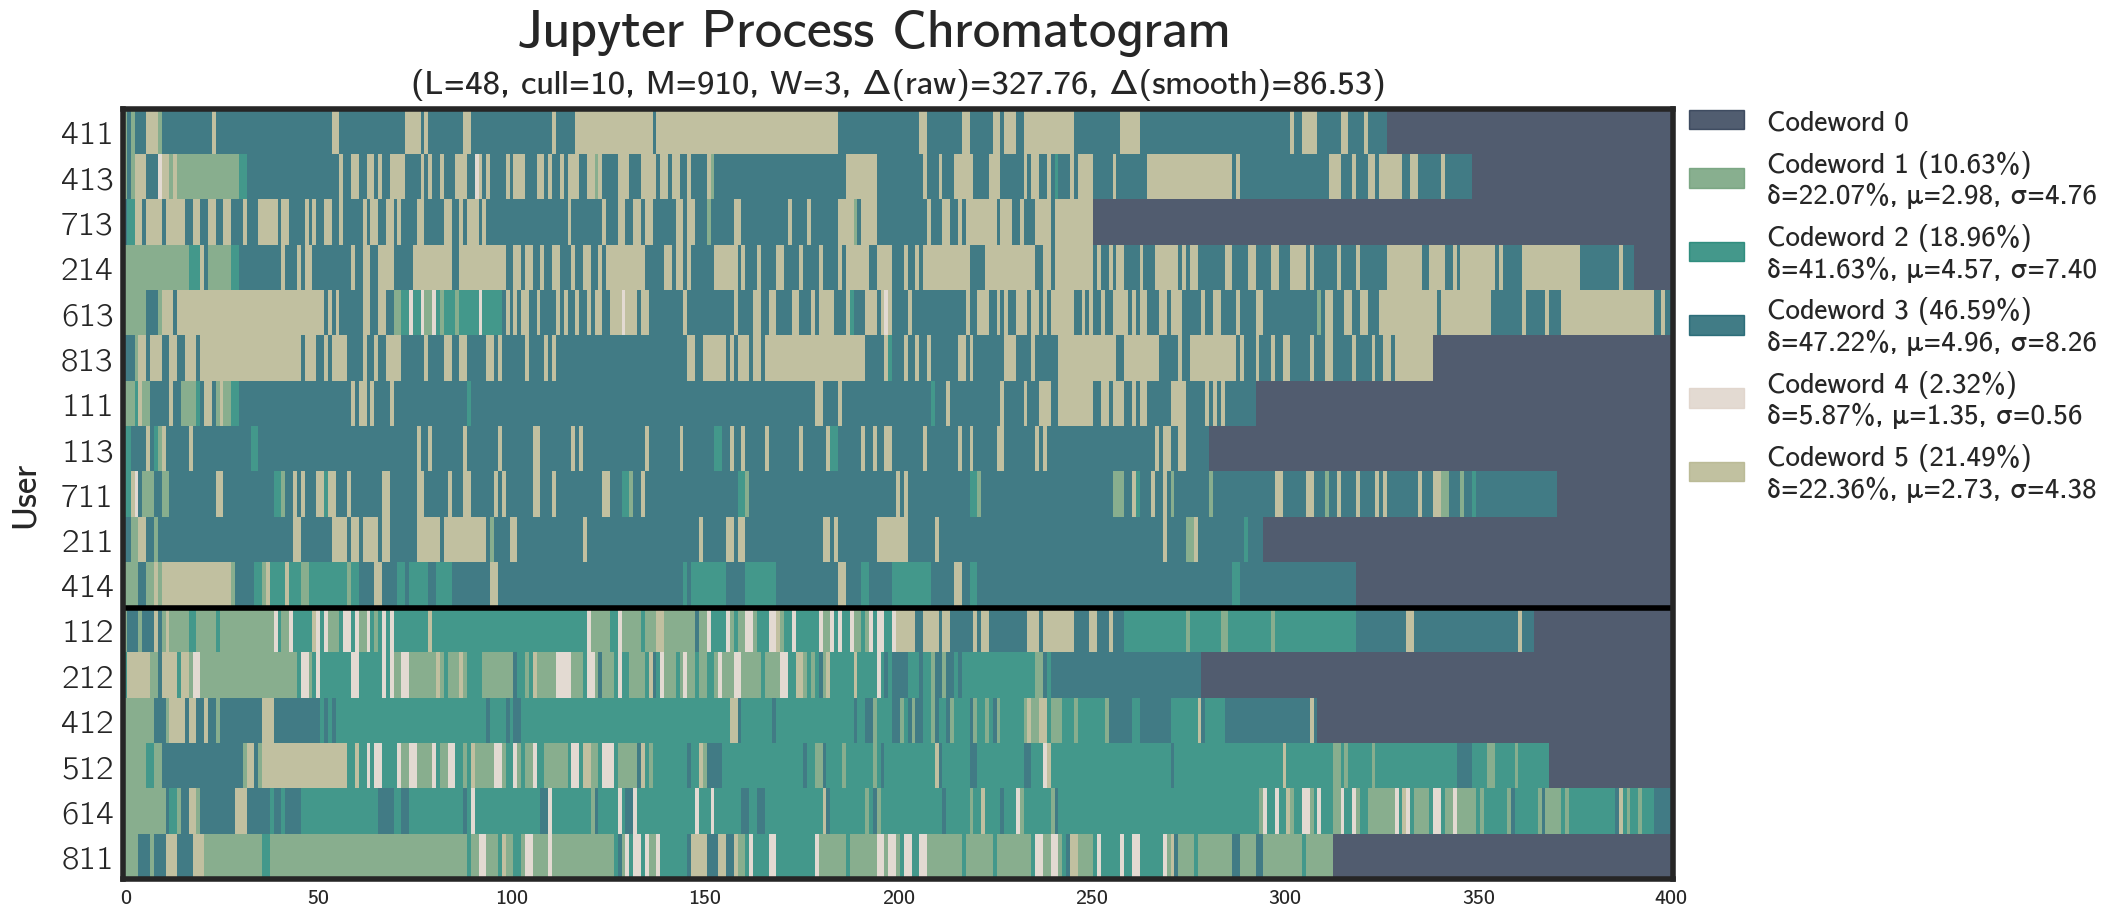

In [11]:
chromatogram.visualize()

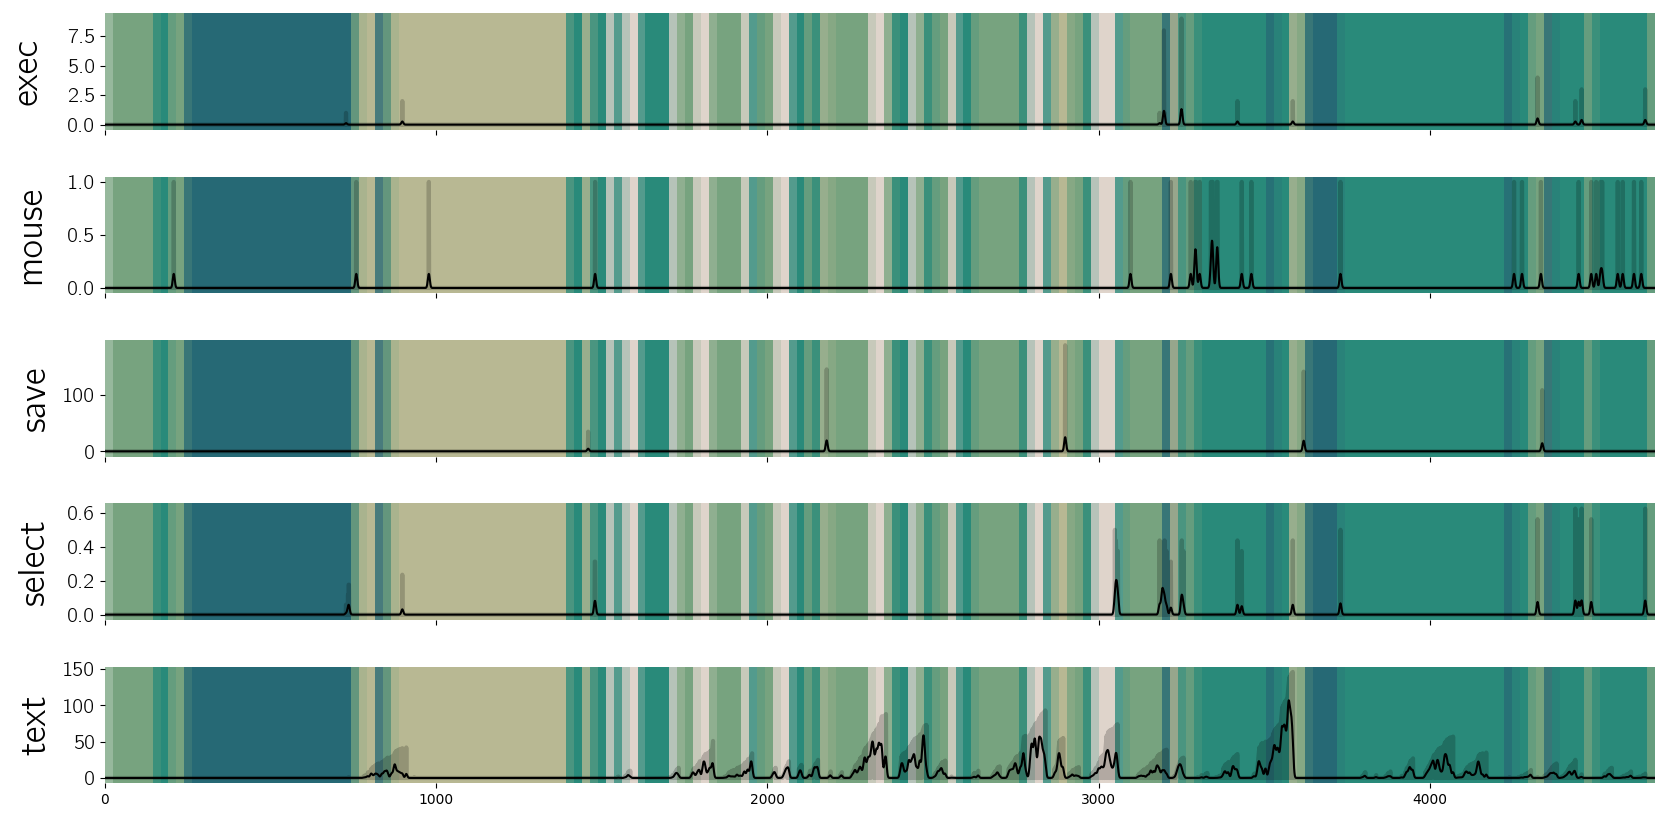

In [17]:
chromatogram.plot_user(512)

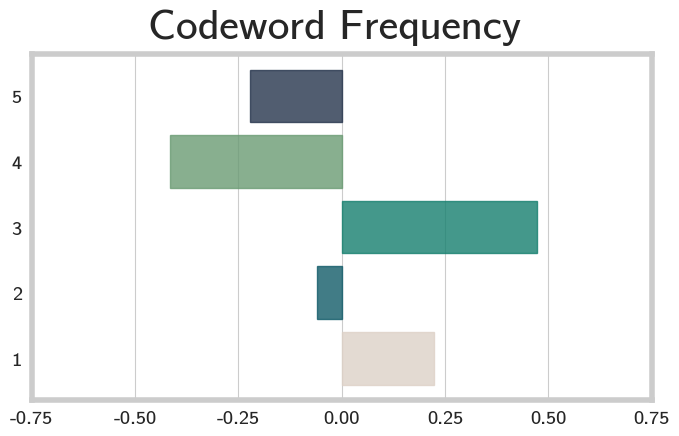

In [20]:
chromatogram.plot_freq_diff()

In [35]:
save_path = 'vtt'
dataset.save_subtitles(save_path, chromatogram, 'jupyter')

File saved! vtt/411/jupyter_411.vtt
File saved! vtt/413/jupyter_413.vtt
File saved! vtt/713/jupyter_713.vtt
File saved! vtt/214/jupyter_214.vtt
File saved! vtt/613/jupyter_613.vtt
File saved! vtt/813/jupyter_813.vtt
File saved! vtt/111/jupyter_111.vtt
File saved! vtt/113/jupyter_113.vtt
File saved! vtt/711/jupyter_711.vtt
File saved! vtt/211/jupyter_211.vtt
File saved! vtt/414/jupyter_414.vtt
File saved! vtt/112/jupyter_112.vtt
File saved! vtt/212/jupyter_212.vtt
File saved! vtt/412/jupyter_412.vtt
File saved! vtt/512/jupyter_512.vtt
File saved! vtt/614/jupyter_614.vtt
File saved! vtt/811/jupyter_811.vtt
